Implementacion de modelo de arbol de decision

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree


In [3]:
# Cargar el dataset
df = pd.read_csv('winequality-red.csv')

# Mostrar las primeras filas del dataset
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [4]:
# Verificar el tamaño del dataset
print("Tamaño del dataset:", df.shape)

# Describir el dataset para obtener estadísticas básicas
print(df.describe())

Tamaño del dataset: (1599, 12)
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.01200

In [6]:
# Verificar si hay valores nulos
print("Valores nulos:", df.isnull().sum())

Valores nulos: fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


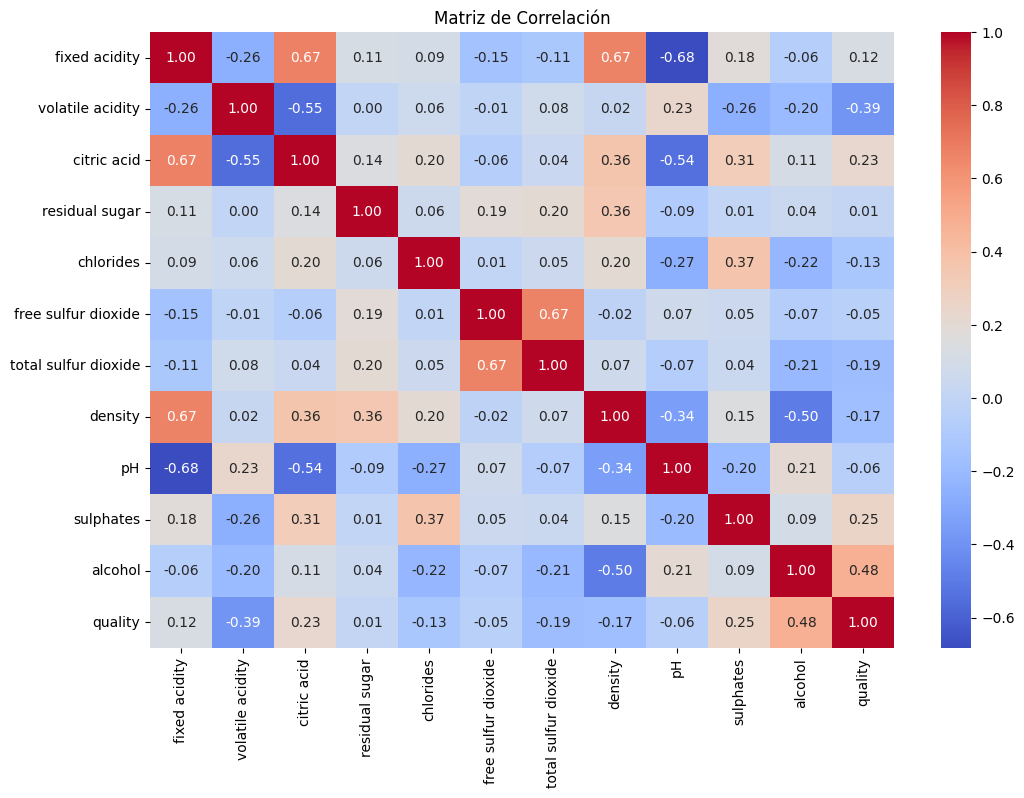

In [8]:
# Correlación entre las variables
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Definimos como variable objetivo a calidad

In [9]:
# Definir variables predictoras y variable objetivo
X = df.drop('quality', axis=1)  # Todas las columnas menos 'quality'
y = df['quality']                # La columna 'quality'

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
# Crear el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Luego de evaluar entrenar el modelo validaremos su presicion

In [15]:
# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.60625
Confusion Matrix:
 [[ 0  1  0  0  1  0]
 [ 1  3  4  3  0  0]
 [ 0  1 93 37  5  0]
 [ 0  3 34 71 15  5]
 [ 0  0  2 11 26  1]
 [ 0  0  1  0  1  1]]
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.38      0.27      0.32        11
           5       0.69      0.68      0.69       136
           6       0.58      0.55      0.57       128
           7       0.54      0.65      0.59        40
           8       0.14      0.33      0.20         3

    accuracy                           0.61       320
   macro avg       0.39      0.42      0.39       320
weighted avg       0.61      0.61      0.61       320



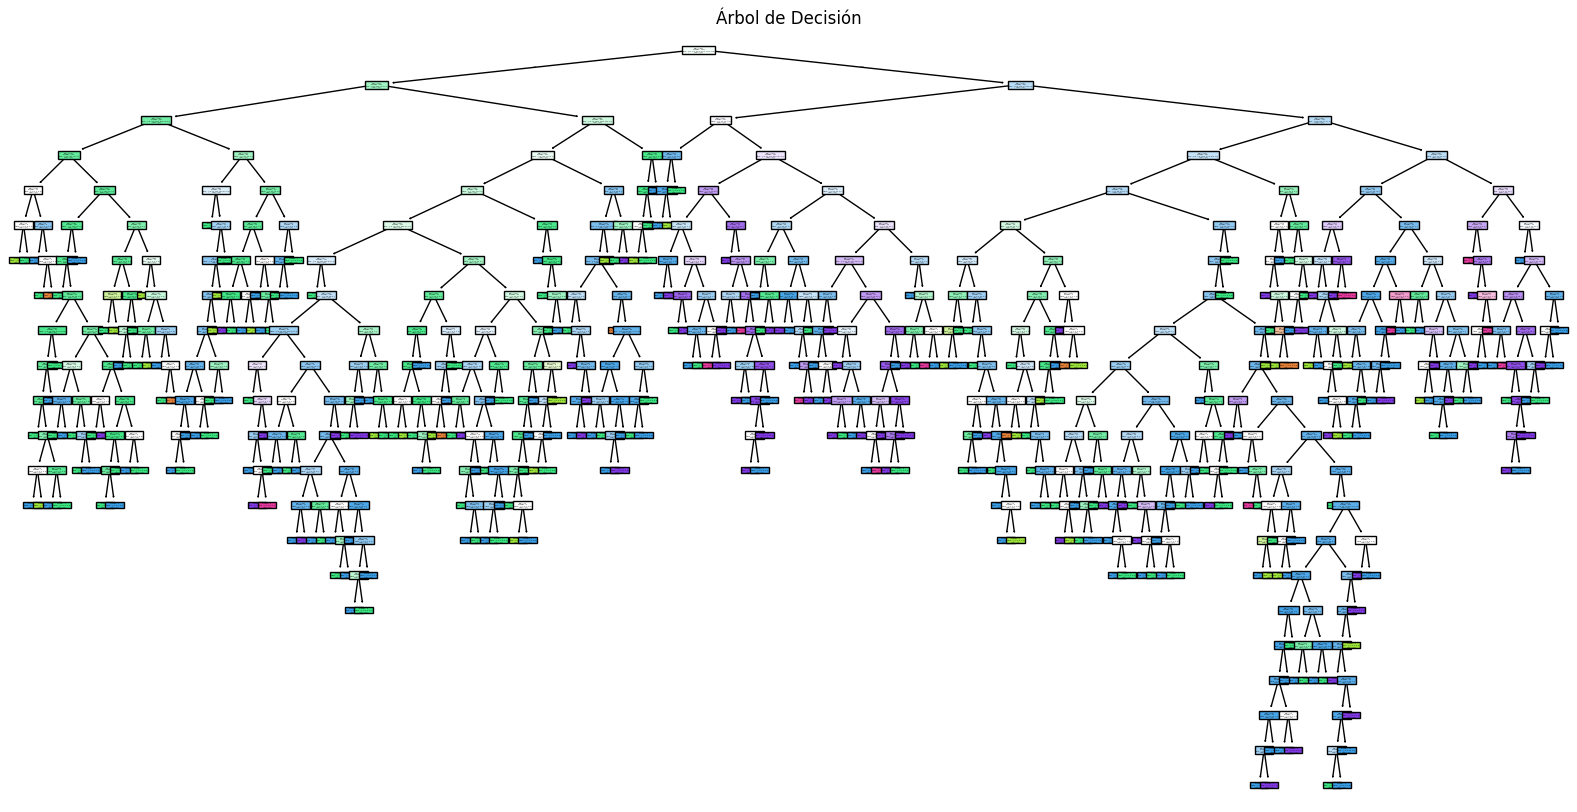

In [17]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=True, filled=True)
plt.title('Árbol de Decisión')
plt.show()